In [1]:
# Importer les dépendances
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import missingno as mso
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importer les données depuis Github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/sample_submission.csv')

In [3]:
# Explorer le dataframe df_train
print("Full train dataset shape is {}".format(df_train.shape))
print(df_train.info())
df_train.head(10)

Full train dataset shape is (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
# Explorer le dataframe df_test
print("Full test dataset shape is {}".format(df_train.shape))
print(df_test.info())
df_test.head(10)

Full test dataset shape is (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


<Axes: >

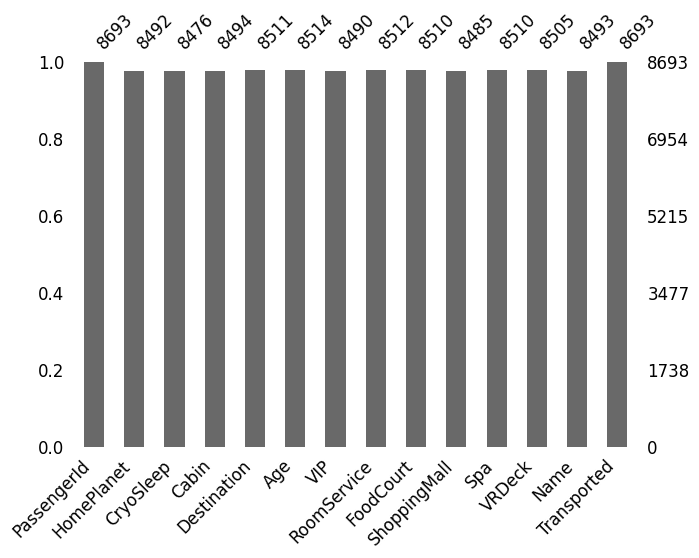

In [5]:
# Afficher les valeurs manquantes de df_train
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

<Axes: >

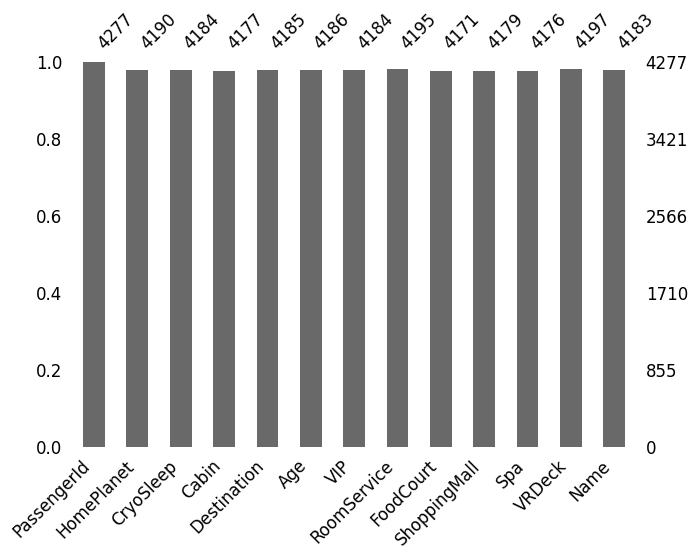

In [6]:
# Afficher les valeurs manquantes de df_test
plt.figure(figsize=(16,5))
ax_test = plt.subplot(1,2,2)
mso.bar(df_test,ax=ax_test,fontsize = 12)

In [7]:
# Retraitement de la colonne Cabin

# Remplacer valeurs manquantes par l'élement le plus fréquent dans df_train et df_test
print('Élément le plus fréquent dans df_train : ' + df_train['Cabin'].mode()[0])
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)
print('Élément le plus fréquent dans df_test : ' + df_test['Cabin'].mode()[0])
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0], inplace=True)

# Création des colonnes Deck et Side depuis la colonne Cabin dans df_train
df_train['Deck'] = df_train['Cabin'].str[:1]
df_train['Side'] = df_train['Cabin'].str[-1]

# Création des colonnes Deck et Side depuis la colonne Cabin dans df_test
df_test['Deck'] = df_test['Cabin'].str[:1]
df_test['Side'] = df_test['Cabin'].str[-1]


df_train[['Cabin','Deck','Side']]

Élément le plus fréquent dans df_train : G/734/S
Élément le plus fréquent dans df_test : G/160/P


,Cabin,Deck,Side
0,B/0/P,B,P
1,F/0/S,F,S
2,A/0/S,A,S
3,A/0/S,A,S
4,F/1/S,F,S
...,...,...,...
8688,A/98/P,A,P
8689,G/1499/S,G,S
8690,G/1500/S,G,S
8691,E/608/S,E,S


In [8]:
# Définition du résultat dans df_train
y_train = df_train['Transported']

# Séparation des colonnes en numerical_features et en categorical_features
list_ignored_features = ['PassengerId', 'Cabin', 'Name','Transported']
list_numerical_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
list_categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Suppression des colonnes à ignorer dans df_train et dans df_test
df_train.drop(columns = list_ignored_features, inplace=True, errors='ignore')
df_test.drop(columns = list_ignored_features, inplace=True, errors='ignore')


df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,S


In [9]:
# Retraitement des categorical_features

# Remplacement des valeurs manquantes par l'élément le plus fréquent dans df_train et df_test
for col in list_categorical_features:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
  df_test[col].fillna(df_test[col].mode()[0], inplace=True)

# Lister les valeurs uniques des categorical_features après retraitement
for col in list_categorical_features:
  print(f'List of unique values in column {col} dans df_train : {df_train[col].unique()}')
  print(f'List of unique values in column {col} dans df_test : {df_test[col].unique()}')

List of unique values in column HomePlanet dans df_train : ['Europa' 'Earth' 'Mars']
List of unique values in column HomePlanet dans df_test : ['Earth' 'Europa' 'Mars']
List of unique values in column CryoSleep dans df_train : [False  True]
List of unique values in column CryoSleep dans df_test : [ True False]
List of unique values in column Destination dans df_train : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
List of unique values in column Destination dans df_test : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
List of unique values in column VIP dans df_train : [False  True]
List of unique values in column VIP dans df_test : [False  True]
List of unique values in column Deck dans df_train : ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
List of unique values in column Deck dans df_test : ['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T']
List of unique values in column Side dans df_train : ['P' 'S']
List of unique values in column Side dans df_test : ['S' 'P']


In [10]:
# Retraitement des numerical_features

# Remplacement des valeurs manquantes par la moyenne de la colonne (mean) dans df_train et df_test
for col in list_numerical_features:
  df_train[col].fillna(round(df_train[col].mean(), 0), inplace=True)
  df_test[col].fillna(round(df_test[col].mean(), 0), inplace=True)

In [11]:
# Encoder les categorical_features dans df_train, df_test et y_train

label_encoder_true_false = LabelEncoder()
df_train['CryoSleep'] = label_encoder_true_false.fit_transform(df_train['CryoSleep'])
df_train['VIP'] = label_encoder_true_false.fit_transform(df_train['VIP'])
df_test['CryoSleep'] = label_encoder_true_false.fit_transform(df_test['CryoSleep'])
df_test['VIP'] = label_encoder_true_false.fit_transform(df_test['VIP'])
y_train = label_encoder_true_false.fit_transform(y_train)

label_encoder_HomePlanet = LabelEncoder()
df_train['HomePlanet'] = label_encoder_HomePlanet.fit_transform(df_train['HomePlanet'])
df_test['HomePlanet'] = label_encoder_HomePlanet.fit_transform(df_test['HomePlanet'])

label_encoder_Destination = LabelEncoder()
df_train['Destination'] = label_encoder_Destination.fit_transform(df_train['Destination'])
df_test['Destination'] = label_encoder_Destination.fit_transform(df_test['Destination'])

label_encoder_Deck = LabelEncoder()
df_train['Deck'] = label_encoder_Deck.fit_transform(df_train['Deck'])
df_test['Deck'] = label_encoder_Deck.fit_transform(df_test['Deck'])

label_encoder_Side = LabelEncoder()
df_train['Side'] = label_encoder_Side.fit_transform(df_train['Side'])
df_test['Side'] = label_encoder_Side.fit_transform(df_test['Side'])

# Définir le dataframe x_train et x_test
x_train = df_train
x_test = df_test

x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1


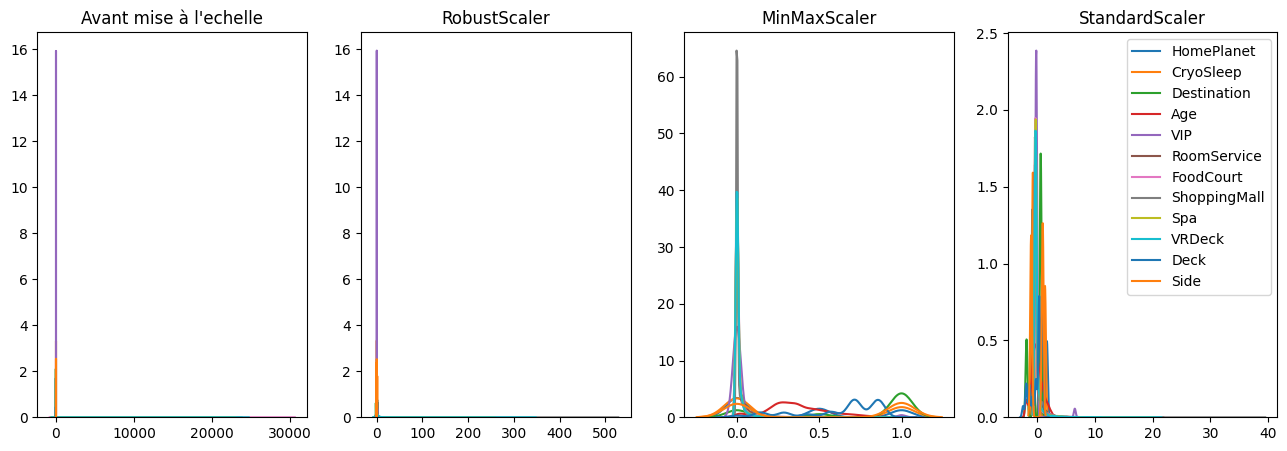

In [12]:
# Tester differents types de mise à l'échelle

# Creation de la fonction pour visualiser les 3 types de mises à l'échelle
def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)

    list_columns = pdf.columns
    plt.legend(list_columns)
    a.set_xlabel("")
    a.set_ylabel("")
    b.set_xlabel("")
    b.set_ylabel("")
    c.set_xlabel("")
    c.set_ylabel("")
    d.set_xlabel("")
    d.set_ylabel("")

    plt.show()


input_features = list(df_train.columns)

scaler = RobustScaler()
scaled_df_train_1 = scaler.fit_transform(df_train[input_features])
scaled_df_train_1 = pd.DataFrame(scaled_df_train_1, columns=input_features)

scaler = MinMaxScaler()
scaled_df_train_2 = scaler.fit_transform(df_train[input_features])
scaled_df_train_2 = pd.DataFrame(scaled_df_train_2, columns=input_features)

scaler = StandardScaler()
scaled_df_train_3 = scaler.fit_transform(df_train[input_features])
scaled_df_train_3 = pd.DataFrame(scaled_df_train_3, columns=input_features)


plotGraphAll(df_train[input_features], scaled_df_train_1, scaled_df_train_2, scaled_df_train_3)

In [13]:
# Selection de MinMaxScaler et mise à l'échelle de x_train et x_test

sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Epoch 1/100
464/464 [==============================] - 3s 3ms/step - loss: 0.6216 - accuracy: 0.6664 - val_loss: 0.5425 - val_accuracy: 0.7441
Epoch 2/100
464/464 [==============================] - 1s 3ms/step - loss: 0.5652 - accuracy: 0.7121 - val_loss: 0.5237 - val_accuracy: 0.7430
Epoch 3/100
464/464 [==============================] - 1s 3ms/step - loss: 0.5475 - accuracy: 0.7217 - val_loss: 0.5094 - val_accuracy: 0.7562
Epoch 4/100
464/464 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7371 - val_loss: 0.5046 - val_accuracy: 0.7706
Epoch 5/100
464/464 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.7419 - val_loss: 0.4824 - val_accuracy: 0.7723
Epoch 6/100
464/464 [==============================] - 1s 2ms/step - loss: 0.5007 - accuracy: 0.7555 - val_loss: 0.4730 - val_accuracy: 0.7849
Epoch 7/100
464/464 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7646 - val_loss: 0.4514 - val_accuracy: 0.7849

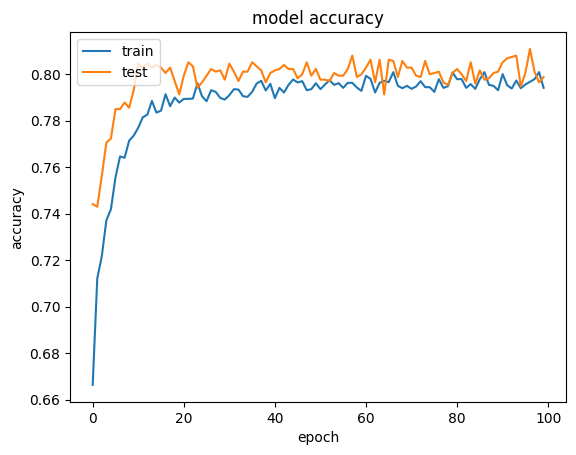

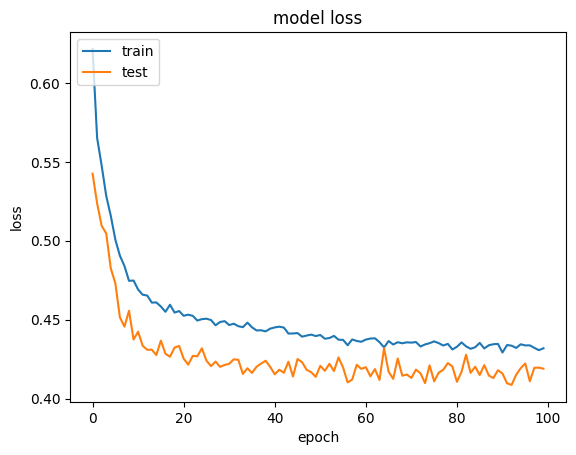

In [14]:
# Creation du modele

classifier_model = tf.keras.Sequential()

#Input layer with 12 inputs neurons
classifier_model.add(tf.keras.layers.Dense(32, activation = 'relu', input_dim = 12))

# Hidden layers
classifier_model.add(tf.keras.layers.Dropout(0.5))
classifier_model.add(tf.keras.layers.Dense(8, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(4, activation = 'relu'))

# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrainement du modele
history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 15, epochs = 100)
# avec :
# validation_split = 0.2 : 20% du jeu de données est utilisé pour évaluer les performances du modèle pendant l'entrainement.
# batch_size = 15 : les données d'entraînement sont divisées en mini-lots de taille 15
# epochs = 100 : 100 itérations complètes sur la totalité du jeu de données durant l'entrainement du modèle.




# Visualiser la précision du modèle
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualiser la fonction loss du modèle
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# Caractéristiques du modèle
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Tester le modele sur le dataframe de test x_test
# En cas d'utilisation de nouvelles données non transformées par MinMaxScaler, une étape supplémentaire est nécessaires pour la mise à l'échelle.

prediction = classifier_model.predict(x_test).tolist()
se = pd.Series(prediction)

# Le df_check contient les résultats de x_test
# Ajout des predictions du modele à df_check
df_check['check'] = se
df_check['check'] = df_check['check'].str.get(0)

# Retraiter le résultat numérique en valeur booléenne (True / False)
series = []
for val in df_check.check:
    if val >= 0.5:
        series.append(False)
    else:
        series.append(True)

df_check['final'] = series


# Boucle pour compter les prédictions correctes
match = 0
nomatch = 0
for val in df_check.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1

# Afficher les resultats
print(f"Predictions correctes: {match} ({round(match/(match+nomatch)*100,2)}%)")
print(f"Predictions incorrectes: {nomatch} \n")

df_check

134/134 [==============================] - 0s 877us/step
Predictions correctes: 2588 (60.51%)
Predictions incorrectes: 1689 



,PassengerId,Transported,check,final
0,0013_01,False,0.723706,False
1,0018_01,False,0.046001,True
2,0019_01,False,0.992432,False
3,0021_01,False,0.993020,False
4,0023_01,False,0.800354,False
...,...,...,...,...
4272,9266_02,False,0.723937,False
4273,9269_01,False,0.507781,False
4274,9271_01,False,0.954014,False
4275,9273_01,False,0.824146,False
